# 数据读取部分

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.utils import shuffle
from tqdm import tqdm
from sklearn.utils import shuffle
import math
import sys
import os

In [2]:
path1 = os.getcwd() #获取当前工作目录路径
path2 = os.path.abspath('.') #获取当前工作目录路径
path3 = os.path.abspath('test.txt') #获取当前目录文件下的工作目录路径
path4 = os.path.abspath('..') #获取当前工作的父目录 ！注意是父目录路径
path5 = os.path.abspath(os.curdir) #获取当前工作目录路径

print("本地路径 = ", sys.argv[0], "\n\n")
print("当前的代码绝对路径 = ",path1)
print("获取当前工作目录路径 = ",path2)
print("获取当前目录文件下的工作目录路径 = ",path3)
print("获取当前工作的父目录 = ",path4)
print("获取当前工作目录路径 = ",path5)

def file_name(file_dir):
    print("\n文件目录结构：")
    for root, dirs, files in os.walk(file_dir):
        print("-"* 40)
        print("root = ", root)   #os.walk()所在目录
        print("dirs = ", dirs)   #os.walk()所在目录的所有目录名
        print("files = ", files)   #os.walk()所在目录的所有非目录文件名

file_name(os.getcwd())

本地路径 =  d:\python\lib\site-packages\ipykernel_launcher.py 


当前的代码绝对路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据
获取当前目录文件下的工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据\test.txt
获取当前工作的父目录 =  C:\Users\程琪皓\Desktop
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\作家按照年份处理数据

文件目录结构：
----------------------------------------
root =  C:\Users\程琪皓\Desktop\作家按照年份处理数据
dirs =  ['.ipynb_checkpoints', 'genre', 'genre_year']
files =  ['full_music_data.csv', 'full_music_data.xlsx', 'GMM.ipynb', 'influence_data.csv', 'influence_data.xlsx', 'NN.ipynb', 'Sort_full_music_data_by_genre.ipynb', 'Sort_genre_by_year.ipynb']
----------------------------------------
root =  C:\Users\程琪皓\Desktop\作家按照年份处理数据\.ipynb_checkpoints
dirs =  []
files =  ['GMM-checkpoint.ipynb', 'NN-checkpoint.ipynb', 'Sort_by_year-checkpoint.ipynb', 'Sort_full_music_data_by_genre-checkpoint.ipynb', 'Sort_genre_by_year-checkpoint.ipynb']
----------------------------------------
root =  C:\Users\程琪皓\Desktop\作家按照年份处理

# Read in the file

In [3]:
genre_id = 1
def read_genre(genre_id, directory = "genre"):
    path = "{}/{}.csv".format(directory, genre_id)
    genre_data = pd.read_csv(path)
    return genre_data
    
genre_dataFrame = read_genre(genre_id = genre_id)
genre_dataFrame.head()

,Unnamed: 0,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,...,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),Unnamed: 19,genre,genre_id
0,7672,['Andr茅 Kostelanetz'],[754767],0.329,0.3480,0.1570,98.127,-12.418,1,0,...,0.0339,0,738387,0,1942,1942,Piano Concerto in F Major: I. Allegro,NaN,Easy Listening,1.0
1,7679,['Andr茅 Kostelanetz'],[754767],0.343,0.4140,0.3810,139.667,-11.431,0,0,...,0.0345,0,384933,0,1942,1942,Piano Concerto in F Major: III. Allegro agitato,NaN,Easy Listening,1.0
2,7682,['Andr茅 Kostelanetz'],[754767],0.233,0.1420,0.0976,90.349,-17.062,1,6,...,0.0365,0,712893,0,1942,1942,Piano Concerto in F Major: II. Adagio - Andant...,NaN,Easy Listening,1.0
3,7676,['Andr茅 Kostelanetz'],[754767],0.165,0.0593,0.0469,69.900,-24.001,1,6,...,0.0388,0,717373,2,1944,1944,Piano Concerto in F Major: II. Adagio - Andant...,NaN,Easy Listening,1.0
4,7677,['Andr茅 Kostelanetz'],[754767],0.323,0.2850,0.3980,138.813,-18.260,1,10,...,0.0350,0,389360,3,1944,1944,Piano Concerto in F Major: III. Allegro agitato,NaN,Easy Listening,1.0


In [4]:
genre_map = \
{0: 'Jazz',
 1: 'Easy Listening',
 2: 'Pop/Rock',
 3: 'Stage & Screen',
 4: 'Vocal',
 5: 'R&B;',
 6: 'Blues',
 7: 'Folk',
 8: 'Religious',
 9: 'International',
 10: 'Country',
 11: 'Latin',
 12: 'Classical',
 13: 'Reggae',
 14: 'Comedy/Spoken',
 15: 'Avant-Garde',
 16: 'Electronic',
 17: "Children's",
 18: 'New Age',
 19: 'Unknown'}

# Find Disturbution of number of songs over a certain year.

In [5]:
def genre_processing(dataFrame, return_type):
    
    # Sort out the data that is inportant
    extractedData = dataFrame.loc[:,["danceability","energy","valence","tempo", "loudness",
                                     "acousticness","instrumentalness","liveness",
                                     "speechiness","explicit","duration_ms", "mode","key","popularity","year"]].sort_values(by=['year'], ascending=True)
    
    popularity = extractedData["popularity"].values
    character_vector = extractedData.loc[:,["danceability","energy","valence","tempo", 
                                            "loudness","acousticness","instrumentalness",
                                            "liveness","speechiness","explicit", "duration_ms", "mode","key"]]
    
    # basic information of year and number
    year_and_songsNumber = extractedData["year"].value_counts()
    year_list = year_and_songsNumber.index.values
    songsNumber_list = year_and_songsNumber.values  # an array denoting the number of songs
    yearNumber = len(year_list)
    
    year_to_songsNumber = {}
    for i in range(yearNumber):
        year_to_songsNumber[year_list[i]] = songsNumber_list[i]
    year_list_sorted = np.sort(year_list)
    
    year_number_list = []
    for i in range(yearNumber):
        try:
            year_number_list.append([year_list_sorted[i],year_to_songsNumber[year_list_sorted[i]]])
        except:
            print(year_to_songsNumber[[year_list_sorted[i]]])
    
    year_number_list = np.array(year_number_list).T
    year_num = year_number_list[-1]
    year_position = np.cumsum(year_num)
    
    # basic information of year and popularity
    popularity_list = []
    fore_pos = 0 
    for i in range(yearNumber):
        popularity_list.append(np.sum(popularity[fore_pos:year_position[i]]))
        fore_pos = year_position[i]
            
    
    Total_number = year_num.sum()
    Total_Popularity = np.sum(popularity_list)
    if return_type == "popularity":
#         print(popularity_list)
        return [np.sort(year_list), popularity_list] , Total_Popularity
        
    if return_type == "number":
        return year_number_list, Total_number



# Visualization

## Number

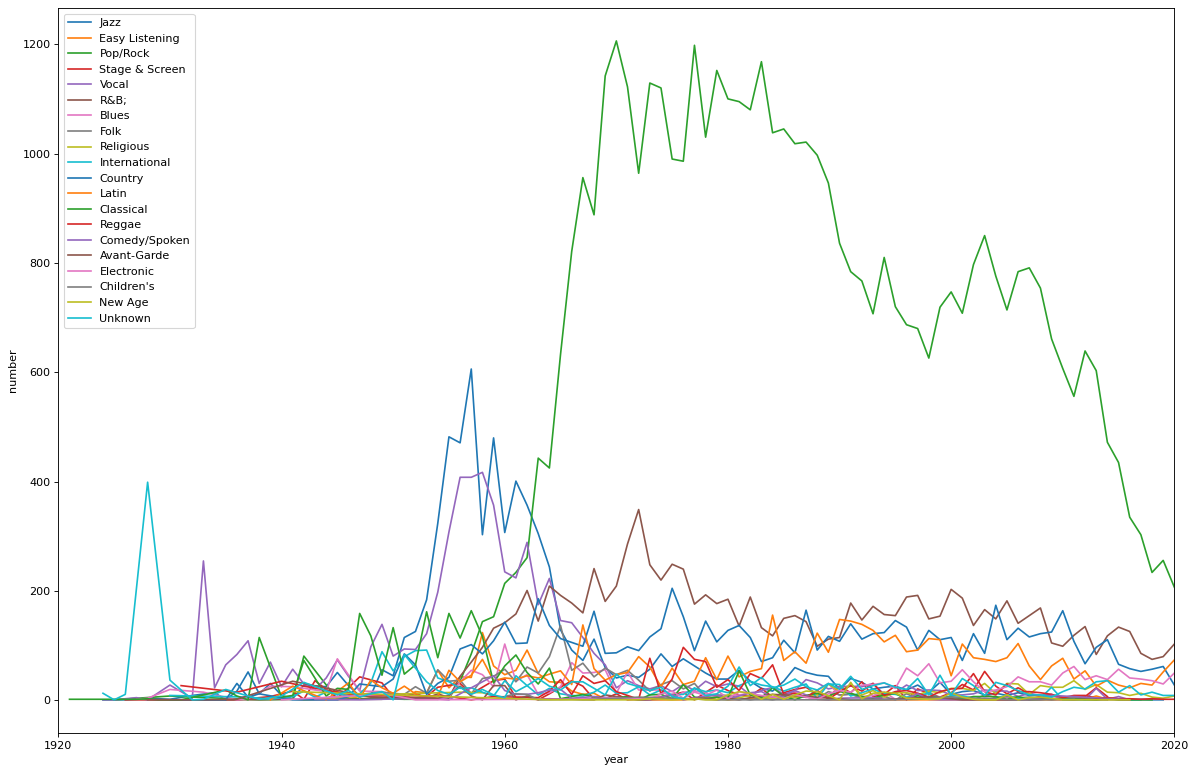

In [6]:

plot_list = []
year_mean_list = []

plt.figure(figsize = (18,12),dpi=80)
for i in range(20):
    genre_dataFrame = read_genre(genre_id = i)
    year_number_list , Total_number = genre_processing(genre_dataFrame,return_type = "number")
    x_axis = year_number_list[0]
    y_axis = year_number_list[-1] #/ Total_number
    year_mean = x_axis * y_axis
    plot_list.append((i,year_mean,x_axis, y_axis))
    year_mean_list.append(year_mean)
    
index = np.argsort(year_mean)

for (i,year_mean,x_axis, y_axis) in plot_list:
    plt.plot(x_axis, y_axis, label = genre_map[i])
#     plt.title(genre_map[i])
#     plt.show()

plt.xlim([1920,2020])
plt.xlabel("year")
plt.ylabel("number")
plt.legend(loc = "upper left")
plt.show()

# Popularity

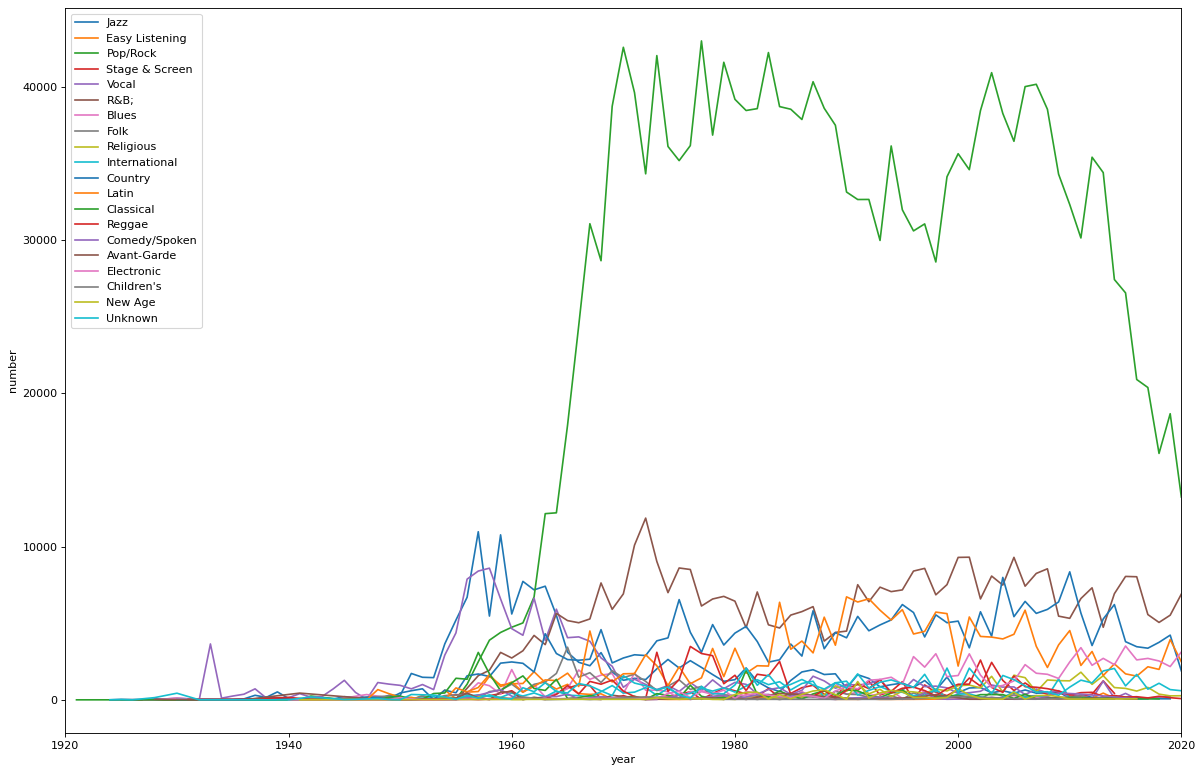

In [7]:

plot_list = []
popularity_mean_list = []

plt.figure(figsize = (18,12),dpi=80)
for i in range(20):
    genre_dataFrame = read_genre(genre_id = i)
    popularity_list , Total_popularity = genre_processing(genre_dataFrame,return_type = "popularity")
    x_axis = popularity_list[0]
    y_axis = popularity_list[-1] #/ Total_popularity
    popularity_mean = x_axis * y_axis
    plot_list.append((i,popularity_mean,x_axis, y_axis))
    year_mean_list.append(popularity_mean)
    
index = np.argsort(popularity_mean)

for (i,popularity_mean,x_axis, y_axis) in plot_list:
    plt.plot(x_axis, y_axis, label = genre_map[i])
#     plt.title(genre_map[i])
#     plt.show()

plt.xlim([1920,2020])
plt.xlabel("year")
plt.ylabel("number")
plt.legend(loc = "upper left")
plt.show()

# The Same genre's number and popularity ~ year

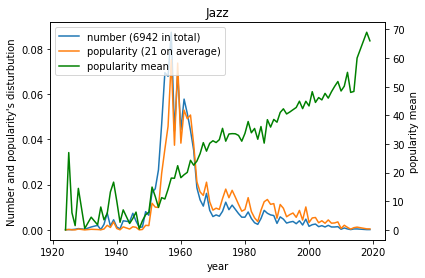

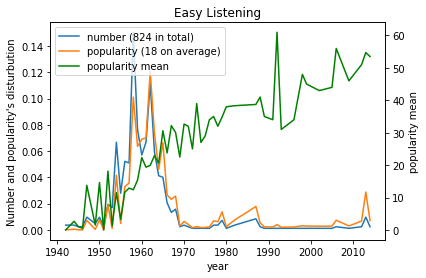

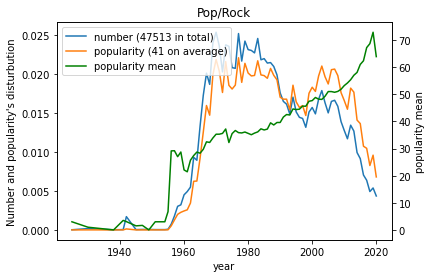

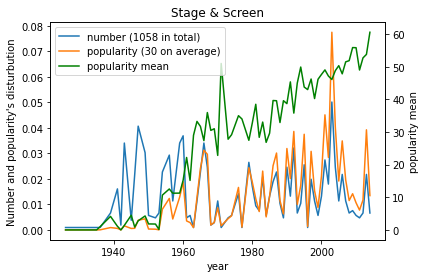

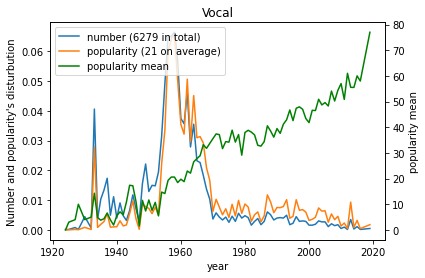

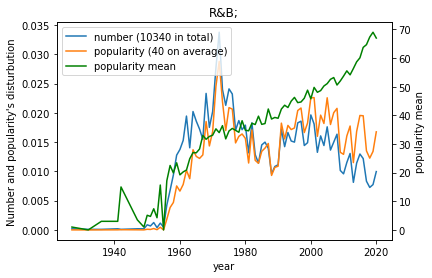

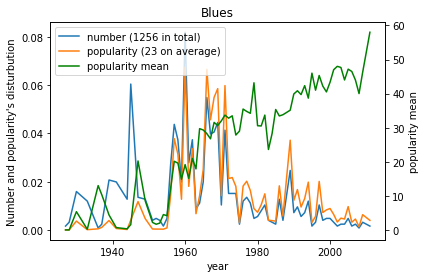

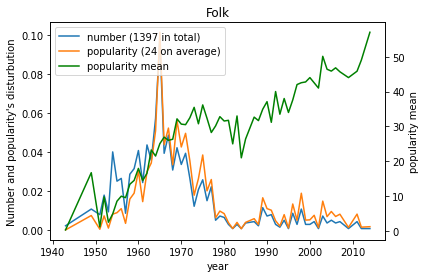

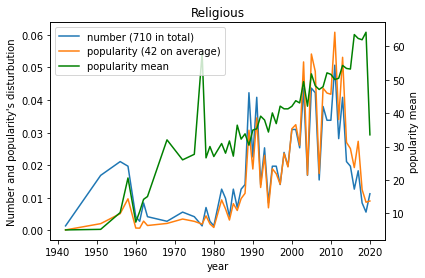

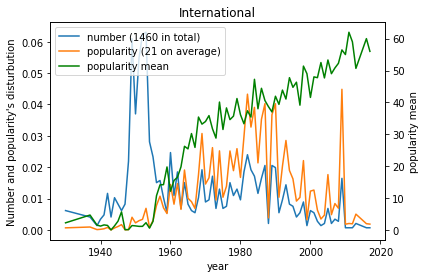

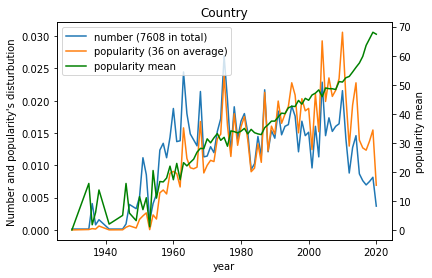

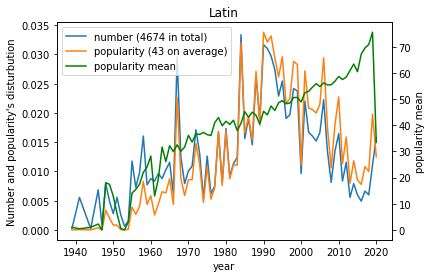

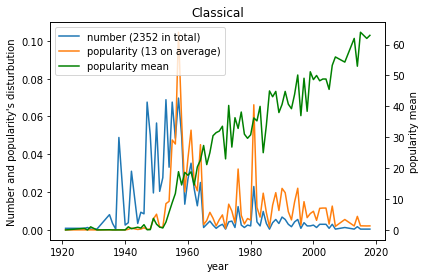

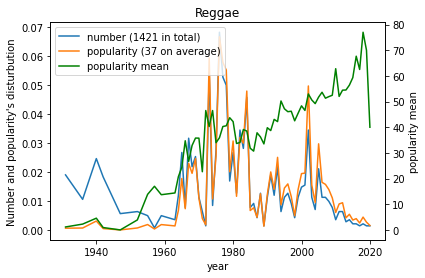

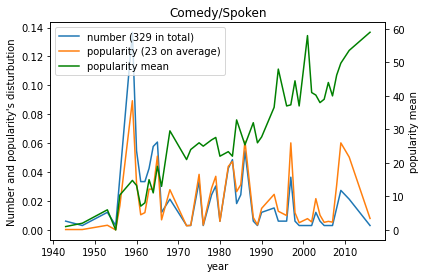

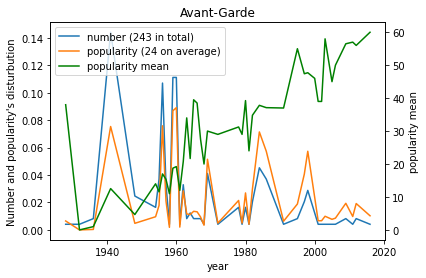

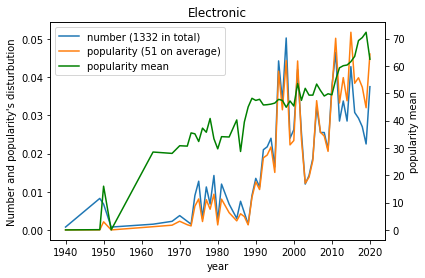

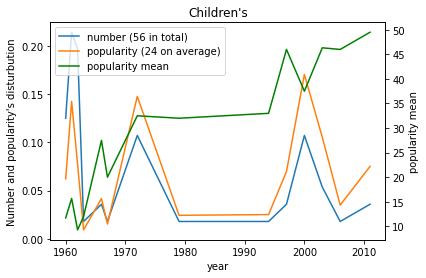

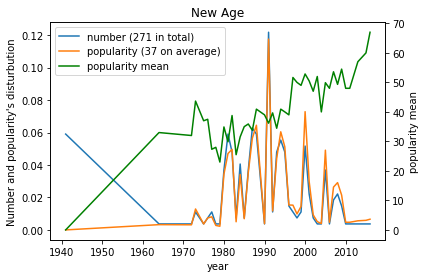

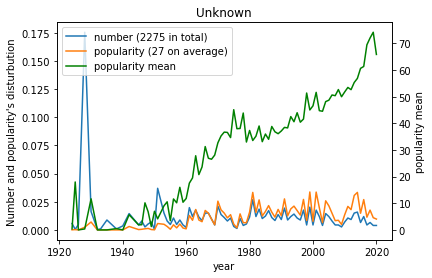

In [8]:

plot_list = []
popularity_mean_list = []

# plt.figure(figsize = (18,12),dpi=80)
for i in range(20):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("year")
    ax1.set_ylabel("Number and popularity's disturbution")

    genre_dataFrame = read_genre(genre_id = i)
    popularity_list , Total_popularity = genre_processing(genre_dataFrame,return_type = "popularity")
    year_number_list , Total_number = genre_processing(genre_dataFrame,return_type = "number")

    x_axis = popularity_list[0]
    y_axis_number = year_number_list[-1]    / Total_number
    y_axis_popularity = popularity_list[-1] / Total_popularity
    y_axis_mean_popularity = popularity_list[-1] / year_number_list[-1]
    
    ax1.plot(x_axis, y_axis_number,    label = "number ({} in total)".format(Total_number))
    ax1.plot(x_axis, y_axis_popularity,label = "popularity ({:.0f} on average)".format(Total_popularity / Total_number))
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("popularity mean")
    plt.plot(x_axis, y_axis_mean_popularity,c = "g", label = "popularity mean")
    
    plt.title(genre_map[i])
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(handles1+handles2, labels1+labels2, loc='upper left')
    
    plt.show()

In [47]:
full_music_data = {"danceability":[0.5263203874313606,0.16403205144827973],
                    "energy":[0.5342478371079926,0.26447724025183267],
                    "valence":[0.5332812944885094,0.2585376133654879],
                    "tempo":[118.96853772625585,29.925255322835987],
                    "loudness":[-10.755944010575554,5.067612837357291],
                    "acousticness":[0.4190568774831198,0.35370999027336875],
                    "instrumentalness":[0.1255745396816148,0.2724918312399652],
                    "liveness":[0.20700085794183445,0.18610339608517842],
                    "speechiness":[0.06380584502745576,0.07610388534934469],
                    "explicit":[0.037085621313809235,0.18897163280656168],
                    "duration_ms":[238590.92141549726,108823.17603973577],
                    "mode":[0.7219951189749847,0.4480158112737567],
                    "popularity":[35.69332926581249,17.262527298425432],}
print(len(full_music_data))

13


# Sorting the character annually for each genre

## Using the Average and Mean Square err of the whole dataset to Standerize each genre

In [76]:
def get_year_range(dataFrame):
    year_value_count = dataFrame["year"].value_counts()
    values = year_value_count.values
    keys  = year_value_count.index.values
    year_value_count_list = np.array([keys, values]).T.tolist()
    
    year_value_count = np.array(sorted(year_value_count_list,key = lambda x:x[0], reverse = False)).T
    years_position = np.cumsum(year_value_count[-1])
    
    years_range = []
    init = 0
    for i in range(len(years_position)):
        years_range.append([init, years_position[i]])
        init = years_position[i]
    
    years_list = year_value_count[0]
    
    return years_range, years_list

def character_conggregation(sub_daraFrame):
    popularity = sub_daraFrame.loc[:,"popularity"].values+1
    popularity_in_total = popularity.sum()
    
    
    collumns = ["danceability","energy","valence","tempo", "loudness",
                "acousticness","instrumentalness","liveness","speechiness","explicit", "duration_ms"]
    extractedData = sub_daraFrame.loc[:,collumns]
    character_list = []
    for collumn in collumns:
        mean, var = full_music_data[collumn]
        character = extractedData[collumn].values
        character = (((character - mean) / var) * (popularity)).sum()/popularity_in_total
        character_list.append(character)
    vector_length = np.sqrt((np.array(character_list)**2).sum())
    character_list = (np.array(character_list) / vector_length).tolist()
    character_list.append(popularity.sum())
    character_list.append(len(popularity))
    character_list.append(vector_length)
    return np.array(character_list)

def genre_character_sorting(dataFrame):
    
    # Sort out the data that is inportant
    extractedData = dataFrame.loc[:,["danceability","energy","valence","tempo", "loudness",
                                     "acousticness","instrumentalness","liveness",
                                     "speechiness","explicit","duration_ms", "mode","key","popularity","year"]].sort_values(by=['year'], ascending=True)
    
    popularity = extractedData["popularity"].values
    character_vector = extractedData.loc[:,["danceability","energy","valence","tempo", 
                                            "loudness","acousticness","instrumentalness",
                                            "liveness","speechiness","explicit", "duration_ms", "mode","key"]]
    years_range, years_list = get_year_range(dataFrame)
    data = []
    for i in range(len(years_list)):
        subFrame = dataFrame[years_range[i][0]:years_range[i][1]]
        data.append(character_conggregation(subFrame))

    return data, years_list

for genre_id in tqdm(range(20),):
    dataFrame = read_genre(genre_id)
    data, years_list = genre_character_sorting(dataFrame)
    df = pd.DataFrame(data)
    df.columns = ["danceability","energy","valence","tempo", "loudness",
                "acousticness","instrumentalness","liveness","speechiness","explicit", "duration_ms","popularity_total","number","vector_length"]
    df.index = years_list
    df.to_csv("genre_year/{}.csv".format(genre_id))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.61it/s]


# 可视化

## 对每一个流派的参数进行可视化（归一化）

In [ ]:
# 请见下回分解